<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Neuroscience of Learning, Memory, Cognition <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 <br>
<font color=696880 size=4>

*TA: Matin Arman Mehr* <br>
*Email: matinarmanmehr@proton.me* <br>

***If you have any issues or questions, please feel free to email me or send your messages in the Telegram group.***

# Student Information
Fill the desired information here

In [2]:
Student_Name = "Radin Khayyam"
Student_ID = "99101579"

print("Student_Name:",Student_Name)
print("Student_ID:",Student_ID)

Student_Name: Radin Khayyam
Student_ID: 99101579


# Introduction
Local Field Potential (LFP) signals possess the capability to provide us with highly valuable and detailed insights into the functioning of the brain. In this practice, we will undertake the analysis of the LFP signal derived from the brain of an anesthetized rat during an olfactory task. <br>
The LFP signal that is given to you comprises three distinct channels: <br>

&emsp;  1. Hippocampus (HPC) <br>
&emsp;  2. Olfactory Tubercle (OT) <br>
&emsp;  3. Medial Prefrontal Cortex (mPFC) <br>

Throughout the task, the anesthetized rat was exposed to two different odorants: <br>

&emsp;  1. Banana (tag = "20") <br>
&emsp;  2. Lime (tag = "40") <br>

Each odorant was presented with an equal probability of 50%. This implies that 50% of the time, the rat was exposed to the banana odor, and the remaining 50% to the lime odor. Upon cessation of odorant release, the resting state (tag = "10") commenced, devoid of any odor stimuli. <br>

**Note that the 4th channel is digitalByte which contains the events tags [10,20,40] in time.**

`Theorical Question 1:` Investigate the functions of the LFP channels (HPC, OT, mPFC) in rats brain and write a paragraph for each of them. (**Note: Academic references must be used**). *`5 Points`* <br>

### Hippocampus (HPC)

The hippocampus plays a critical role in the formation, organization, and storage of new memories as well as connecting certain sensations and emotions to these memories. It is essential for learning and memory, specifically in converting short-term memory to more permanent memory, and for recalling spatial relationships in the world about us. Local field potentials (LFPs) recorded from the hippocampus of rats have been extensively studied to understand neural oscillations that correlate with learning processes and memory retrieval. For instance, theta oscillations (4-12 Hz) in the hippocampus are particularly prominent during exploratory behavior and rapid eye movement (REM) sleep, suggesting their role in memory consolidation and navigation. Theta rhythms are thought to be involved in temporal coding and network coordination across the hippocampus and connected brain regions.

**Ref:** Buzsáki, G. (2002). Theta oscillations in the hippocampus. Neuron, 33(3), 325-340.

### Olfactory Tubercle (OT)

The olfactory tubercle, a component of the ventral striatum, plays a significant role in the processing and perception of odors, but is also involved in reward processing and motivated behaviors. LFP studies in the olfactory tubercle have provided insights into how sensory integration and reward-related signals are processed in the brain. For instance, oscillatory activity within the olfactory tubercle has been linked to both olfactory and reward cues, indicating its role as an integrative hub in the olfactory and reward systems. Additionally, the oscillatory dynamics in this region are involved in modulating the hedonic value of odors and in the decision-making processes based on olfactory cues, reflecting its complex contribution beyond mere olfactory processing.

**Ref:** Wesson, D. W., & Wilson, D. A. (2011). Sniffing behavior correlates with natural variation in odorant-evoked olfactory bulb neural response efficacy in rats. Behavioral Neuroscience, 125(5), 680-690.

### Medial Prefrontal Cortex (mPFC)

The medial prefrontal cortex (mPFC) in rats is involved in higher-order executive functions such as decision making, working memory, and inhibition of inappropriate behaviors. LFP recordings from the mPFC have been crucial in revealing how this region orchestrates complex behaviors and regulates emotional responses. The mPFC is known to exhibit various forms of neural oscillations that correlate with cognitive processes; for example, delta and theta oscillations are often associated with attentional processes and behavioral flexibility. Research using LFPs in this area has demonstrated its role in encoding rules and expectations, adapting strategies, and updating changes in task contingencies, crucial for adaptive behaviors. The mPFC’s interactions with other brain regions through these oscillations are vital for the integration and processing of information necessary for complex cognitive tasks.

**Ref:** Euston, D. R., Gruber, A. J., & McNaughton, B. L. (2012). The role of medial prefrontal cortex in memory and decision making. Neuron, 76(6), 1057-1070.





# Import Libraries

In [3]:

%pip install pymatreader
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pymatreader
import scipy as sp
import pandas as pd
import math
from pymatreader import read_mat

# Reading the Data
Import the `data.mat` file that is given to you by using pymatreader library. Add all of the dataset information into the *`data`* dict file. *`5 Points`*

In [4]:
data = {}
data['srate'] = 2000                            # Sampling rate
data['channel_names'] = ['HPC','OT','mPFC']     # The name of each channel
data['events'] = ['rest','banana','lime']       # Events names
data['tags'] = [10,20,40]                       # Tag of each event

data['channelData'] = read_mat('data.mat')['channelData'][:,0:3]
data['digitalByte'] = read_mat('data.mat')['channelData'][:,3]





# Plot the raw LFP
Let's plot the first `2.5s` of each channels' signal! *`3 Points`*

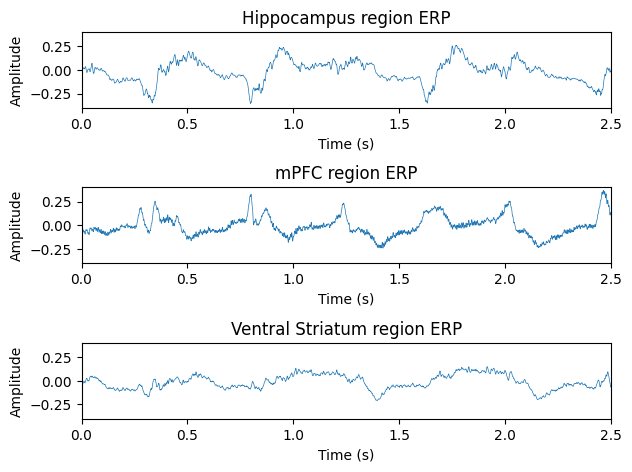

In [5]:
t = np.arange(start=0, stop=2.5, step=1/data['srate'])
samples = np.arange(start = 0,stop = int(data['srate']*2.5),step = 1)
fig, axs = plt.subplots(3)


axs[0].plot(t, data['channelData'][samples,0], linewidth=0.5)
axs[0].set_title("Hippocampus region ERP")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude")
axs[0].set_ylim(-0.4, 0.4)
axs[0].set_xlim(0, 2.5)

axs[1].plot(t, data['channelData'][samples,1], linewidth=0.5)
axs[1].set_title("mPFC region ERP")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Amplitude")
axs[1].set_ylim(-0.4, 0.4)
axs[1].set_xlim(0, 2.5)

axs[2].plot(t, data['channelData'][samples,2], linewidth=0.5)
axs[2].set_title("Ventral Striatum region ERP")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Amplitude")
axs[2].set_ylim(-0.4, 0.4)
axs[2].set_xlim(0, 2.5)

fig.tight_layout(pad=1.0)

plt.show()


# Power Spectrum Density (PSD)
Calculate and plot the power spectrum density for the frequency range up to 40Hz in each channel of the raw LFP signals. You can employ a simple FFT for this task. *`5 Points`*

In [7]:
def calc_PSD(data, sample_rate):
    (f, S)= sp.signal.periodogram(data, sample_rate, scaling='density')
    # (f, S)= sp.signal.welch(data, sample_rate)
    return f, S

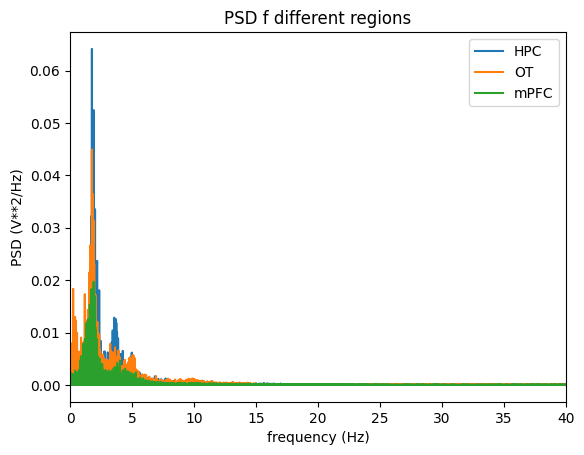

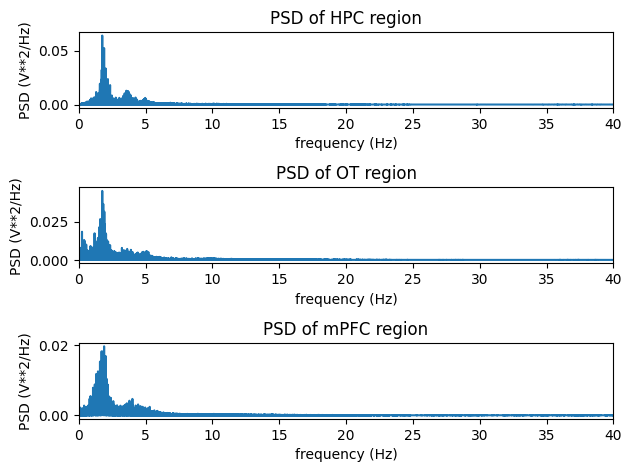

In [8]:
f, PSD_ch1 = calc_PSD(data['channelData'][:, 0], data['srate'])
f, PSD_ch2 = calc_PSD(data['channelData'][:, 1], data['srate'])
f, PSD_ch3 = calc_PSD(data['channelData'][:, 2], data['srate'])

plt.plot(f, PSD_ch1)
plt.plot(f, PSD_ch2)
plt.plot(f, PSD_ch3)

plt.title("PSD f different regions")
plt.xlabel("frequency (Hz)")
plt.ylabel("PSD (V**2/Hz)")
plt.xlim(0,40)

plt.legend(["HPC" ,"OT", "mPFC"])

plt.show()

fig, axs = plt.subplots(3)

axs[0].plot(f, PSD_ch1)
axs[0].set_title("PSD of HPC region")
axs[0].set_xlabel("frequency (Hz)")
axs[0].set_ylabel("PSD (V**2/Hz)")
axs[0].set_xlim(0, 40)


axs[1].plot(f, PSD_ch2)
axs[1].set_title("PSD of OT region")
axs[1].set_xlabel("frequency (Hz)")
axs[1].set_ylabel("PSD (V**2/Hz)")
axs[1].set_xlim(0, 40)


axs[2].plot(f, PSD_ch3)
axs[2].set_title("PSD of mPFC region")
axs[2].set_xlabel("frequency (Hz)")
axs[2].set_ylabel("PSD (V**2/Hz)")
axs[2].set_xlim(0, 40)


fig.tight_layout(pad=1.0)

plt.show()

Compute the average power of the theta band (4Hz-8Hz) for each channel and create a bar plot to display the results. *`2 Points`* <br>

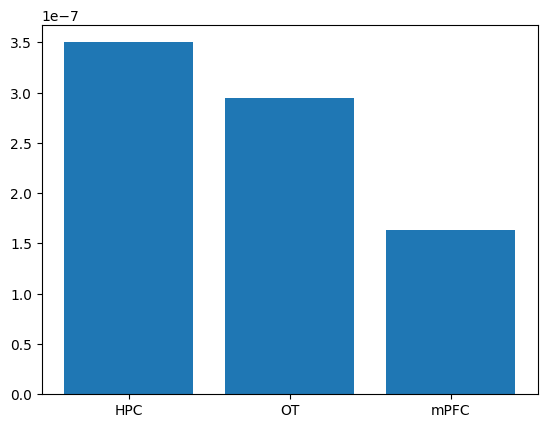

In [ ]:
tetha_band = np.where((f <= 8) & (f >= 3))
dx = f[1]-f[0]
power_tetha = []

power_tetha.append(np.mean(PSD_ch1[tetha_band])*dx)
power_tetha.append(np.mean(PSD_ch2[tetha_band])*dx)
power_tetha.append(np.mean(PSD_ch3[tetha_band])*dx)

plt.figure()
plt.bar(data['channel_names'], power_tetha)
plt.show()



`Theorical Question 2:` Why is the theta power is higher in the hippocampus compared to other regions? Do a little research :D *`3 Points`*

Theta power is typically higher in the hippocampus compared to the olfactory tubercle and medial prefrontal cortex (mPFC) during olfactory tasks in anesthetized rats due to the hippocampus's central role in memory processing, particularly spatial and contextual memory. The intrinsic generation of theta rhythms in the hippocampus, supported by robust connections with the medial septum and entorhinal cortex, remains active even under anesthesia, facilitating the integration and consolidation of sensory information. In contrast, the olfactory tubercle and mPFC, which are more involved in processing reward-related information and executive functions respectively, may not sustain similar levels of theta activity, particularly under the suppressive effects of anesthetics on their primary functional outputs.

# Preprocessing
First thing first, filter each channel between 0.5Hz-128Hz. *`3 Points`* <br>
**Note: Use zero-phase filter to maintain the time features of the signals after filtering.**

I've added two functions: one for downsampling the data and the other for implementing notch filter on data

In [69]:
def downsapmle(data, factor):
    data_ds = np.empty((data['channelData'].shape[0]//factor+1,3))
    digitalByte_ds = np.empty((len(data['channelData']))//factor+1)
    fs_ds = data['srate']//5
    for i in range(data['channelData'].shape[0]):
      if i%5 == 0:
        data_ds[i//5,:] = data['channelData'][i,:]
        digitalByte_ds[i//5] = np.round(data['digitalByte'][i])

    return data_ds, np.round(digitalByte_ds), fs_ds

def BPF_filter(data, fs, frq_low,frq_high,filt_order):
    b, a = sp.signal.butter(filt_order, [frq_low / (fs / 2), frq_high / (fs / 2)], btype='band')
    filtered_data = np.empty((data.shape[0],data.shape[1]))
    for i in range(3):
      filtered_data[:,i]= sp.signal.filtfilt(b, a, data[:,i])

    return filtered_data

def notch_filter(data, fs, f):
    b, a = sp.signal.iirnotch(f, 30.0, fs)
    filtered_data_2 = np.empty((data.shape[0],data.shape[1]))
    for i in range(3):
      filtered_data_2[:,i]= sp.signal.filtfilt(b, a, data[:,i])
    return filtered_data_2

Next, epoch the data according to each event (banana and lime) as you've done at the previous practice. Each trial must contain `1.5` seconds before and `3` seconds after the onset of each stimulus. Consider computing zscore of time series in each trial. *`3 Points`*

In [70]:
def z_score(data):
    data_normalized = np.empty((data.shape[0] ,data.shape[1], data.shape[2]))
    for i in range (len(data)):
        mean = np.mean(data[i, :, :], axis=0)
        std = np.std(data[i, :, :], axis=0)
        data_normalized[i, :, :] = (data[i, :, :] - mean) / std

    return data_normalized

def epoch_data(data, digitalByte, fs, time_interval):
    data_epoched = {}
    data_epoched['data_Banana'] = []
    data_epoched['data_Lime'] = []

    for i in range(1, len(digitalByte)):
      if (digitalByte[i-1] != 20 and digitalByte[i] == 20):
        data_epoched['data_Banana'].append(data[i+int(time_interval[0]*fs):i+int(time_interval[1]*fs)])
      elif (digitalByte[i-1] != 40 and digitalByte[i] == 40):
        data_epoched['data_Lime'].append(data[i+int(time_interval[0]*fs):i+int(time_interval[1]*fs)])

    data_epoched['data_Banana'] = np.array(data_epoched['data_Banana'])
    data_epoched['data_Lime'] = np.array(data_epoched['data_Lime'])

    data_epoched['data_Banana'] = z_score(data_epoched['data_Banana'])
    data_epoched['data_Lime'] = z_score(data_epoched['data_Lime'])


    return data_epoched







In [71]:
data_ds, digitalByte_ds, fs_ds = downsapmle(data,5)
filtered_data = BPF_filter(data_ds, fs_ds, 0.5, 128, 4)
# filtered_data = notch_filter(filtered_data, fs_ds, 50)
data_epoched = epoch_data(filtered_data, digitalByte_ds, fs_ds ,[-1.5,3])



In [72]:
def calc_ERP(data, fs):
    ERP = np.mean(data, axis=0)
    ERP = ERP - np.mean(ERP[0:int(fs*1.5),:],axis=0)
    return ERP

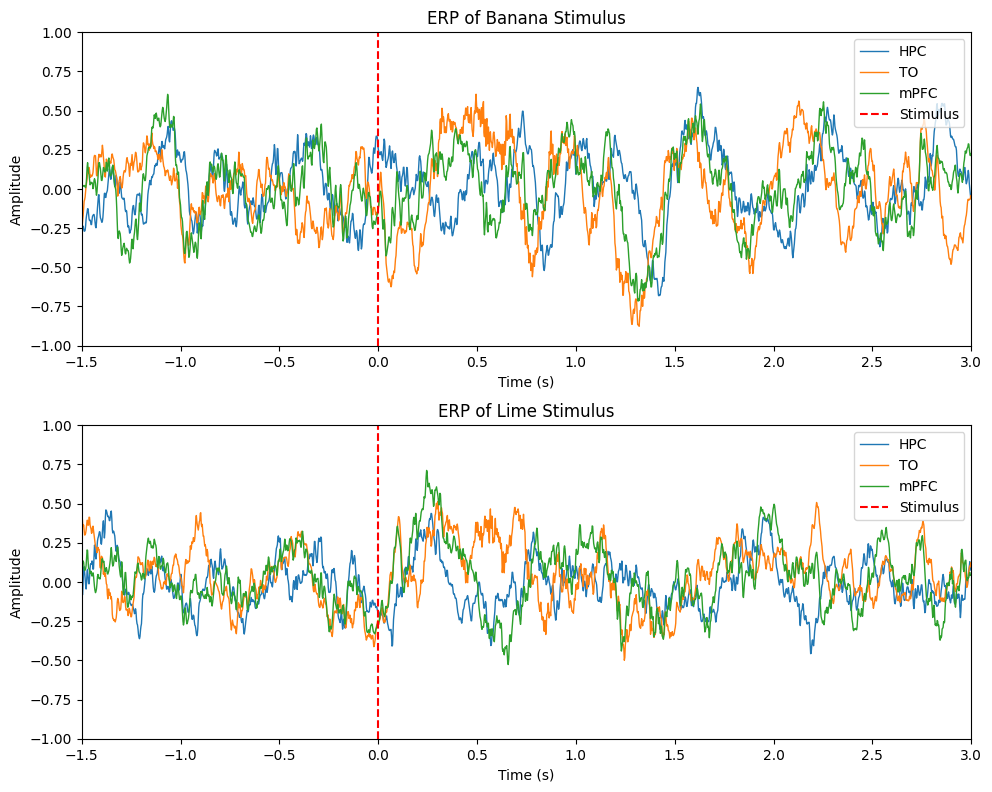

In [73]:
ERP_Banana = calc_ERP(data_epoched['data_Banana'], fs_ds)
ERP_Lime = calc_ERP(data_epoched['data_Lime'], fs_ds)

t = np.arange(start=-1.5, stop=3, step=1/fs_ds)

fig = plt.figure(figsize=(10,8))

plt.subplot(2, 1, 1)
plt.plot(t, ERP_Banana[:, 0], linewidth=1)
plt.plot(t, ERP_Banana[:, 1], linewidth=1)
plt.plot(t, ERP_Banana[:, 2], linewidth=1)
plt.title("ERP of Banana Stimulus")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.ylim(-1, 1)
plt.xlim(-1.5, 3)
plt.axvline(0,color='red',linestyle='dashed')
plt.legend(['HPC','TO','mPFC','Stimulus'],loc=1)

plt.subplot(2, 1, 2)
plt.plot(t, ERP_Lime[:, 0], linewidth=1)
plt.plot(t, ERP_Lime[:, 1], linewidth=1)
plt.plot(t, ERP_Lime[:, 2], linewidth=1)
plt.title("ERP of Lime Stimulus")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.ylim(-1, 1)
plt.xlim(-1.5, 3)
plt.axvline(0,color='red',linestyle='dashed')
plt.legend(['HPC','TO','mPFC','Stimulus'],loc=1)

fig.tight_layout(pad=1.0)

plt.show()

# Phase-Lock Value (PLV)

In the previous practice, you studied the phase-lock value as a method for evaluation of functional connectivity between different parts of brain. Now, we aim to implement it for the olfactory task and investigate the effect of odorants on the connections between channels. You can use [this paper](https://doi.org/10.1016%2Fj.neuroimage.2013.02.008) for more help. <br>

Compute the phase-lock value between different channels for `1.5sec` before and `1.5sec` after the onset of the stimulus for each trials across a frequency range of `20Hz-60Hz` for both odorants. Next, determine the mean and standard error of the calculated phase-lock values across trials. At the end, create a plot showing the bounded lines for phase-lock values at various frequencies. Compare the results before and after stimulus. *`20 Points`*

In [74]:
from scipy.signal import hilbert,butter, filtfilt, firwin

def calc_PLV(data_1, data_2, frq_range, filt_order, fs):

    start_f = frq_range[0]
    end_f = frq_range[1]
    f_axes = np.linspace(start_f, end_f, 100)

    num_trials = data_1.shape[0]
    bandwidth = 1
    PLV = np.empty((len(f_axes)))
    counter = 0

    for f in f_axes:
      filter_range = [(f-bandwidth/2)/(0.5*fs), (f+bandwidth/2)/(0.5*fs)]

      # b, a = butter(filt_order, filter_range, btype='band')
      # data_1_filtered = filtfilt(b, a, data_1)
      # data_2_filtered = filtfilt(b, a, data_2)
      taps = firwin(filt_order, filter_range, pass_zero=False)
      data_1_filtered = filtfilt(taps, 1.0, data_1)
      data_2_filtered = filtfilt(taps, 1.0, data_2)

      analytic_data_1 = hilbert(data_1_filtered)
      analytic_data_2 = hilbert(data_2_filtered)

      phase_data_1 = np.angle(analytic_data_1)
      phase_data_2 = np.angle(analytic_data_2)

      PLV[counter] = np.abs(np.mean(np.exp(1j * (phase_data_1 - phase_data_2))))
      counter += 1

    return PLV

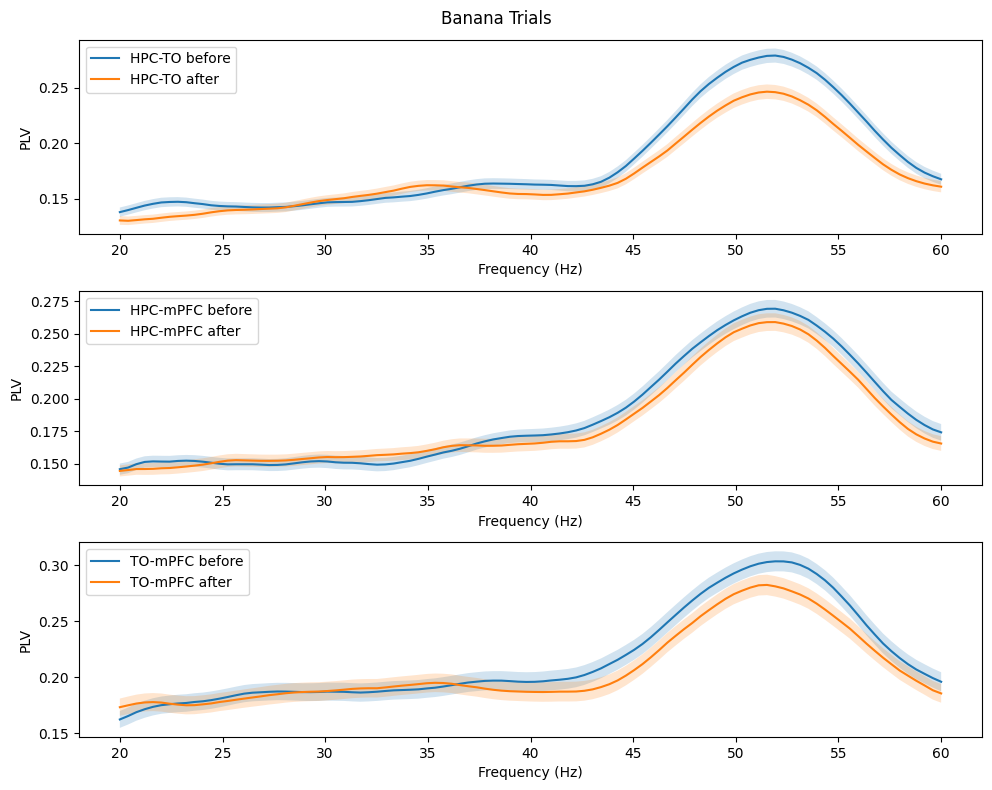

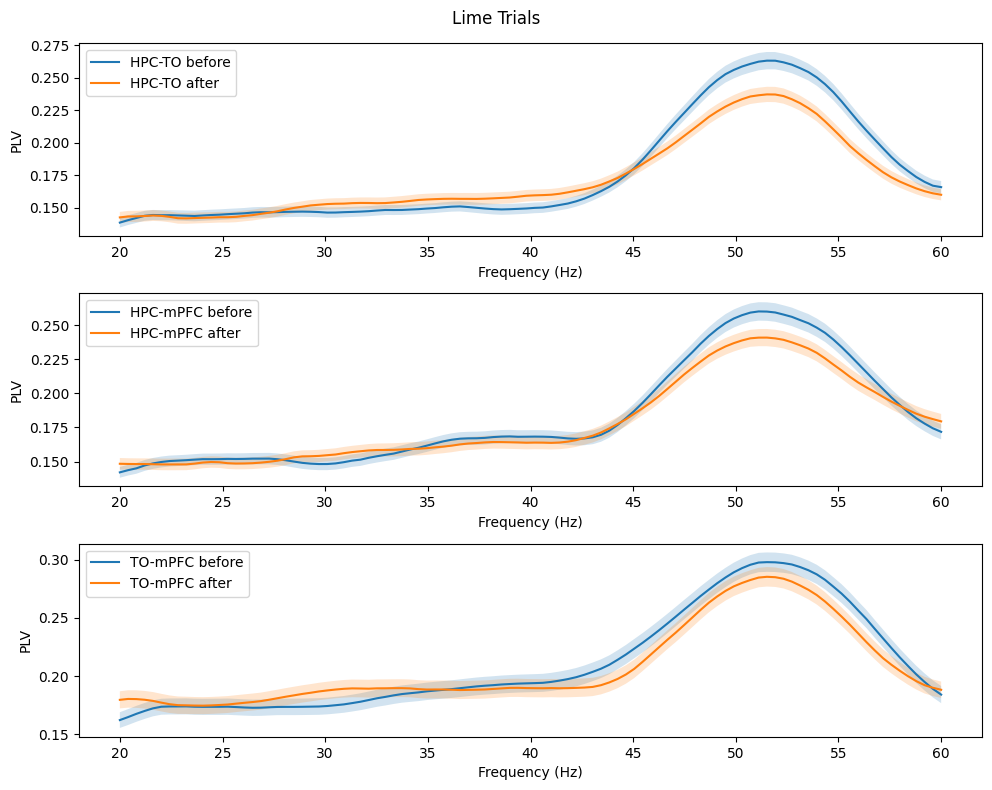

In [75]:
num_ban_trls = data_epoched['data_Banana'].shape[0]
num_lim_trls = data_epoched['data_Lime'].shape[0]

stim_ti = 1.5
smpl_be = np.arange(int((-1.5+stim_ti)*fs_ds), int(stim_ti*fs_ds))
smpl_af = np.arange(int(stim_ti*fs_ds), int((1.5+stim_ti)*fs_ds))

data_ban_be = data_epoched['data_Banana'][:, smpl_be, :]
data_ban_af = data_epoched['data_Banana'][:, smpl_af, :]
data_lim_be = data_epoched['data_Lime'][:, smpl_be, :]
data_lim_af = data_epoched['data_Lime'][:, smpl_af, :]


PLV_ban_be = np.empty((num_ban_trls*(num_ban_trls-1)//2 + num_ban_trls, 100, 3))
PLV_ban_af = np.empty((num_ban_trls*(num_ban_trls-1)//2 + num_ban_trls, 100, 3))
PLV_lim_be = np.empty((num_lim_trls*(num_lim_trls-1)//2 + num_lim_trls, 100, 3))
PLV_lim_af = np.empty((num_lim_trls*(num_lim_trls-1)//2 + num_lim_trls, 100, 3))

tmp = 0
for i in range(num_ban_trls):
  for j in range(i, num_ban_trls):
    PLV_ban_be[tmp, :, 0] = (calc_PLV(data_ban_be[i,:,0], data_ban_be[j,:,1], [20,60], 32, fs_ds))
    PLV_ban_be[tmp, :, 1] = (calc_PLV(data_ban_be[i,:,0], data_ban_be[j,:,2], [20,60], 32, fs_ds))
    PLV_ban_be[tmp, :, 2] = (calc_PLV(data_ban_be[i,:,1], data_ban_be[j,:,2], [20,60], 32, fs_ds))
    PLV_ban_af[tmp, :, 0] = (calc_PLV(data_ban_af[i,:,0], data_ban_af[j,:,1], [20,60], 32, fs_ds))
    PLV_ban_af[tmp, :, 1] = (calc_PLV(data_ban_af[i,:,0], data_ban_af[j,:,2], [20,60], 32, fs_ds))
    PLV_ban_af[tmp, :, 2] = (calc_PLV(data_ban_af[i,:,1], data_ban_af[j,:,2], [20,60], 32, fs_ds))
    tmp += 1

PLV_ban_be_mean = np.mean(PLV_ban_be, axis=0)
PLV_ban_be_sem = sp.stats.sem(PLV_ban_be, axis=0)
PLV_ban_af_mean = np.mean(PLV_ban_af, axis=0)
PLV_ban_af_sem = sp.stats.sem(PLV_ban_af, axis=0)

tmp = 0
for i in range(num_lim_trls):
  for j in range(i, num_lim_trls):
    PLV_lim_be[tmp, :, 0] = (calc_PLV(data_lim_be[i,:,0], data_lim_be[j,:,1], [20,60], 32, fs_ds))
    PLV_lim_be[tmp, :, 1] = (calc_PLV(data_lim_be[i,:,0], data_lim_be[j,:,2], [20,60], 32, fs_ds))
    PLV_lim_be[tmp, :, 2] = (calc_PLV(data_lim_be[i,:,1], data_lim_be[j,:,2], [20,60], 32, fs_ds))
    PLV_lim_af[tmp, :, 0] = (calc_PLV(data_lim_af[i,:,0], data_lim_af[j,:,1], [20,60], 32, fs_ds))
    PLV_lim_af[tmp, :, 1] = (calc_PLV(data_lim_af[i,:,0], data_lim_af[j,:,2], [20,60], 32, fs_ds))
    PLV_lim_af[tmp, :, 2] = (calc_PLV(data_lim_af[i,:,1], data_lim_af[j,:,2], [20,60], 32, fs_ds))
    tmp += 1

PLV_lim_be_mean = np.mean(PLV_lim_be, axis=0)
PLV_lim_be_sem = sp.stats.sem(PLV_lim_be, axis=0)
PLV_lim_af_mean = np.mean(PLV_lim_af, axis=0)
PLV_lim_af_sem = sp.stats.sem(PLV_lim_af, axis=0)

t = np.linspace(20, 60, len(PLV_ban_be_mean))

fig = plt.figure(figsize=(10,8))

plt.subplot(3, 1, 1)
plt.plot(t, PLV_ban_be_mean[:,0], label='HPC-TO before')
plt.fill_between(t, PLV_ban_be_mean[:,0]-PLV_ban_be_sem[:,0], PLV_ban_be_mean[:,0]+PLV_ban_be_sem[:,0], alpha=0.2)
plt.plot(t, PLV_ban_af_mean[:,0], label='HPC-TO after')
plt.fill_between(t, PLV_ban_af_mean[:,0]-PLV_ban_af_sem[:,0], PLV_ban_af_mean[:,0]+PLV_ban_af_sem[:,0], alpha=0.2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PLV")
plt.legend(loc='upper left')

plt.subplot(3, 1, 2)
plt.plot(t, PLV_ban_be_mean[:,1], label='HPC-mPFC before')
plt.fill_between(t, PLV_ban_be_mean[:,1]-PLV_ban_be_sem[:,1], PLV_ban_be_mean[:,1]+PLV_ban_be_sem[:,1], alpha=0.2)
plt.plot(t, PLV_ban_af_mean[:,1], label='HPC-mPFC after')
plt.fill_between(t, PLV_ban_af_mean[:,1]-PLV_ban_af_sem[:,1], PLV_ban_af_mean[:,1]+PLV_ban_af_sem[:,1], alpha=0.2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PLV")
plt.legend(loc='upper left')

plt.subplot(3, 1, 3)
plt.plot(t, PLV_ban_be_mean[:,2], label='TO-mPFC before')
plt.fill_between(t, PLV_ban_be_mean[:,2]-PLV_ban_be_sem[:,2], PLV_ban_be_mean[:,2]+PLV_ban_be_sem[:,2], alpha=0.2)
plt.plot(t, PLV_ban_af_mean[:,2], label='TO-mPFC after')
plt.fill_between(t, PLV_ban_af_mean[:,2]-PLV_ban_af_sem[:,2], PLV_ban_af_mean[:,2]+PLV_ban_af_sem[:,2], alpha=0.2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PLV")
plt.legend(loc='upper left')
fig.suptitle('Banana Trials')

fig.tight_layout(pad=1.0)
plt.show()

fig = plt.figure(figsize=(10,8))

plt.subplot(3, 1, 1)
plt.plot(t, PLV_lim_be_mean[:,0], label='HPC-TO before')
plt.fill_between(t, PLV_lim_be_mean[:,0]-PLV_lim_be_sem[:,0], PLV_lim_be_mean[:,0]+PLV_lim_be_sem[:,0], alpha=0.2)
plt.plot(t, PLV_lim_af_mean[:,0], label='HPC-TO after')
plt.fill_between(t, PLV_lim_af_mean[:,0]-PLV_lim_af_sem[:,0], PLV_lim_af_mean[:,0]+PLV_lim_af_sem[:,0], alpha=0.2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PLV")
plt.legend(loc='upper left')

plt.subplot(3, 1, 2)
plt.plot(t, PLV_lim_be_mean[:,1], label='HPC-mPFC before')
plt.fill_between(t, PLV_lim_be_mean[:,1]-PLV_lim_be_sem[:,1], PLV_lim_be_mean[:,1]+PLV_lim_be_sem[:,1], alpha=0.2)
plt.plot(t, PLV_lim_af_mean[:,1], label='HPC-mPFC after')
plt.fill_between(t, PLV_lim_af_mean[:,1]-PLV_lim_af_sem[:,1], PLV_lim_af_mean[:,1]+PLV_lim_af_sem[:,1], alpha=0.2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PLV")
plt.legend(loc='upper left')


plt.subplot(3, 1, 3)
plt.plot(t, PLV_lim_be_mean[:,2], label='TO-mPFC before')
plt.fill_between(t, PLV_lim_be_mean[:,2]-PLV_lim_be_sem[:,2], PLV_lim_be_mean[:,2]+PLV_lim_be_sem[:,2], alpha=0.2)
plt.plot(t, PLV_lim_af_mean[:,2], label='TO-mPFC after')
plt.fill_between(t, PLV_lim_af_mean[:,2]-PLV_lim_af_sem[:,2], PLV_lim_af_mean[:,2]+PLV_lim_af_sem[:,2], alpha=0.2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PLV")
plt.legend(loc='upper left')
fig.suptitle('Lime Trials')

fig.tight_layout(pad=1.0)
plt.show()


# Phase-Amplitude Coupling (PAC)

One of the recent methods used for studying functional connectivity is Phase-Amplitude Coupling (PAC). This method is widely used to explain the way of communication among various neural populations in the brain. For more detailed information on PAC and how it's calculated, you can refer to [this paper](https://doi.org/10.1038/s41598-019-48870-2). Moreover, [this paper](https://doi.org/10.1038/s41598-019-43272-w) has also explained how different neural networks communicate through their theta and gamma oscillations to transfer information.

`Theorical Question 3:` Read both papers and explain the process of calculating PAC and how we infer PAC as a metric for communication between different neural oscillations. `5 Points`

**Note: You don't have to read both papers in detail; just simply collect the information you NEED :D**

To calculate phase-amplitude coupling (PAC) using a time-frequency based method, we follow several steps:

- **Apply RID-Rihaczek Distribution**: This is used to estimate both:
  - The time-varying amplitude of high-frequency oscillations, typically found in the gamma band.
  - The time-varying phase of low-frequency oscillations, such as those in the alpha or theta bands.

- **Extracting Data**:
  - **High-Frequency Amplitude**: This is obtained by extracting the frequency marginal from the RID-Rihaczek distribution for the specific band.
  - **Low-Frequency Phase**: This is determined by identifying the phase angle at the required frequency within the RID-Rihaczek distribution.

- **Calculating PAC**: The process involves using the mean vector length (MVL) metric, where the low-frequency phase and high-frequency amplitude are combined into a complex vector at each time point. The overall magnitude of these vectors is then calculated.

This method shows how the phase of low-frequency oscillations can regulate and synchronize the amplitude of higher-frequency oscillations, a crucial mechanism for:
- **Synchronization across Brain Regions**: Low-frequency oscillations travel long distances in the brain, helping to synchronize activities across different areas.
- **Local Modulation**: The phase of these low frequencies can influence the amplitude of higher frequencies within specific areas.
- **Coordination and Communication**: PAC provides a way for low-frequency oscillations to organize and regulate the information carried by high-frequency amplitudes, which is essential for cognitive functions.

A robust PAC value indicates significant regulatory interaction between the two frequency bands, playing a key role in neural communication during cognitive processes.

Now, we aim to analyze the data and compute the Phase-Amplitude Coupling (PAC) for each channel. First thing first, as explained in [the paper](https://doi.org/10.1038/s41598-019-48870-2) you've read, we need to find the Bilinear time–frequency distribution of the signal using the RID-Rihaczek method. The code for this is provided below:

In [62]:
## DON'T CHANGE THE CODES OF THIS BLOCK

def _rhu(n):
    '''
    Return integer rounded of the input. The half will round up.
    1.3 -> 1
    2.5 -> 3
    -0.5 -> 0
    -0.3 -> -1
    '''
    return int(math.floor(n + 0.5))


def _datawrap(x: np.ndarray, n: int) -> np.ndarray:
    '''
    The calculation of signal spectrum, such as periodogram, uses FFT internally,
    where the length of FFT is denoted as NFFT. In theory, when using FFT,
    the signal in both time domain and frequency domain are discrete and periodic,
    where the period is given by NFFT. Hence, if you specify an NFFT that is less
    than the signal length, it actually introduces the aliasing in the time domain
    and make the signal (even if its length is N>NFFT) periodic with NFFT.
    When you take FFT of this sequence, you are working with this aliased sequence.
    This is what datawrap do for you.

    For example: Sequence 1 2 3 4 5, period 5, it returns
        1 2 3 4 5
                  1 2 3 4 5
                            1 2 3 4 5
        --------------------------------
              ... 1 2 3 4 5 ...

    i.e., original series. assume a period of 3, then it looks like

        1 2 3 4 5
              1 2 3 4 5
                    1 2 3 4 5
        ------------------------
          ... 5 7 3 ...

    A sequence that is wrapped around and has only a length of 3.

    >>> _datawrap(range(1, 6),3)
    array([5, 7, 3])

    '''
    return np.array([sum(x[i::n]) for i in range(n)])


def _chwi_krn(D: np.ndarray, L: np.ndarray, A: int = None):
    '''

    CHWI_KRN Choi-Williams kernel function.

    https://en.wikipedia.org/wiki/Bilinear_time%E2%80%93frequency_distribution#Choi%E2%80%93Williams_distribution_function

    K = _chwi_krn(D, L, A) returns the values K of the Choi-Williams kernel function
    evaluated at the doppler-values in matrix D and the lag-values in matrix L.
    Matrices D and L must have the same size. The values in D should be in the range
    between -1 and +1 (with +1 being the Nyquist frequency). The parameter A is
    optional and controls the "diagonal bandwidth" of the kernel. Matrix K is of the
    same size as the matrices D and L. Parameter A defaults to 10 if omitted.

    Copyright (c) 1998 by Robert M. Nickel
    Revision: 1.1.1.1
    Date: 2001/03/05 09:09:36

    Written by: Mahdi Kiani, March 2021

    '''

    if A is None:
        A = 10
    K = np.exp((-1/(A*A)) * (D*D*L*L))

    return K

def rid_rihaczek(x: np.ndarray, fbins: int):
    '''
    Munia, T.T.K., Aviyente, S. Time-Frequency Based Phase-Amplitude
    Coupling Measure For Neuronal Oscillations. Sci Rep 9, 12441 (2019).
    https://doi.org/10.1038/s41598-019-48870-2

    This function computes reduced interference Rihaczek distribution

    Parameter:
        x: signal
        fbins=required frequency bins

    Returns:
        tfd = Generated reduced interference Rihaczek distribution

    Written by: Mahdi Kiani, March 2021
    '''

    tbins = x.shape[0]
    amb = np.zeros((tbins, tbins))
    for tau in range(tbins):
        amb[tau, :] = (np.conj(x) * np.concatenate((x[tau:], x[:tau])))

    ambTemp = np.concatenate(
        (amb[:, _rhu(tbins/2):], amb[:, :_rhu(tbins/2)]), axis=1)
    amb1 = np.concatenate(
        (ambTemp[_rhu(tbins/2):, :], ambTemp[:_rhu(tbins/2), :]), axis=0)

    D = np.outer(np.linspace(-1, 1, tbins), np.linspace(-1, 1, tbins), )
    K = _chwi_krn(D, D, 0.01)
    df = K[:amb1.shape[0], :amb1.shape[1]]
    ambf = amb1 * df

    A = np.zeros((fbins, tbins))
    tbins = tbins - 1

    if tbins != fbins:
        for tt in range(tbins):
            A[:, tt] = _datawrap(ambf[:, tt], fbins)
    else:
        A = ambf

    tfd = np.fft.fft(A, axis=0)

    return tfd

Next, compute the local Phase-Amplitude Coupling (l-PAC) within each channel and the inter-regional PAC (ir-PAC) across different channels for **ERP signals** Calculate these values for each phase and amplitude frequency within a time interval of `1sec` before and `1sec` after the onset of stimulation for both odorants. The phase frequency should be in the theta band `4Hz-8Hz`, and the amplitude frequency should be in the low gamma band `20Hz-60Hz`. Afterwards, plot the comodulograms ([f_phase, f_amplitude, PAC] plot) and compare the results before and after the stimulus. *`20 Points`* <br>

**Note: Ensure that the scale of PACs in plots is equalized before and after the stimulus to make them comparable.**

In [63]:
def calc_MVL(tfd1, tfd2, fph, famp):

    amp = np.abs(tfd2[famp,:])
    phase = np.angle(tfd1[fph,:])

    MVL = np.abs(np.mean(amp*np.exp(1j * phase)))

    return MVL

def calc_PAC(data_1, data_2, fph_range, famp_range, time_range, res_freq, fs):

    data_1_time_range = data_1[int(time_range[0]*fs):int(time_range[1]*fs)]
    data_2_time_range = data_2[int(time_range[0]*fs):int(time_range[1]*fs)]

    fbins = int(fs/res_freq)

    tfd_1 = rid_rihaczek(data_1_time_range, fbins)
    tfd_2 = rid_rihaczek(data_2_time_range, fbins)

    famp_axes = np.linspace(famp_range[0],famp_range[1], int((famp_range[1]-famp_range[0])/res_freq + 1))
    fph_axes = np.linspace(fph_range[0],fph_range[1],int((fph_range[1]-fph_range[0])/res_freq + 1))

    PAC_matrix = np.zeros((len(famp_axes), len(fph_axes)))
    counter_1 = 0
    for fa in famp_axes:
      counter_2 = 0
      for fph in fph_axes:
        PAC_matrix[counter_1,counter_2] = calc_MVL(tfd_1, tfd_2, int(fph/res_freq), int(fa/res_freq))
        counter_2 += 1
      counter_1 += 1

    return PAC_matrix

def plot_PAC (PAC_matrix_before, PAC_matrix_after, fph_axes, famp_axes, title, mode):

    fig = plt.figure(figsize=(10,10))
    if mode == 0:
      title_set = ['HPC before', 'HPC after', 'OT before', 'OT after', 'mPFC before', 'mPFC after']
    elif mode == 1:
      title_set = ['HPC_OT before', 'HPC_OT after', 'HPC_mPFC before', 'HPC_mPFC after', 'OT_mPFC before', 'OT_mPFC after']

    for i in range(3):
      vmin = 0
      if np.max(PAC_matrix_before[i, :, :]) > np.max(PAC_matrix_after[i, :, :]):
        vmax = np.max(PAC_matrix_before[i, :, :])
      else:
        vmax = np.max(PAC_matrix_after[i, :, :])

      plt.subplot(3,2,2*i+1)
      plt.pcolormesh(fph_axes, famp_axes, PAC_matrix_before[i, :, :], cmap='jet', vmin=vmin, vmax=vmax, shading='gouraud')
      plt.colorbar(label='PAC')
      plt.xlabel('fph (Hz)')
      plt.ylabel('famp (Hz)')
      plt.title(title_set[2*i])
      plt.grid(True)

      plt.subplot(3,2,2*i+2)
      plt.pcolormesh(fph_axes, famp_axes, PAC_matrix_after[i, :, :], cmap='jet', vmin=vmin, vmax=vmax, shading='gouraud')
      plt.colorbar(label='PAC')
      plt.xlabel('fph (Hz)')
      plt.ylabel('famp (Hz)')
      plt.title(title_set[2*i+1])
      plt.grid(True)

    fig.suptitle(title, fontsize=24)
    fig.tight_layout(pad=1.0)
    plt.show()

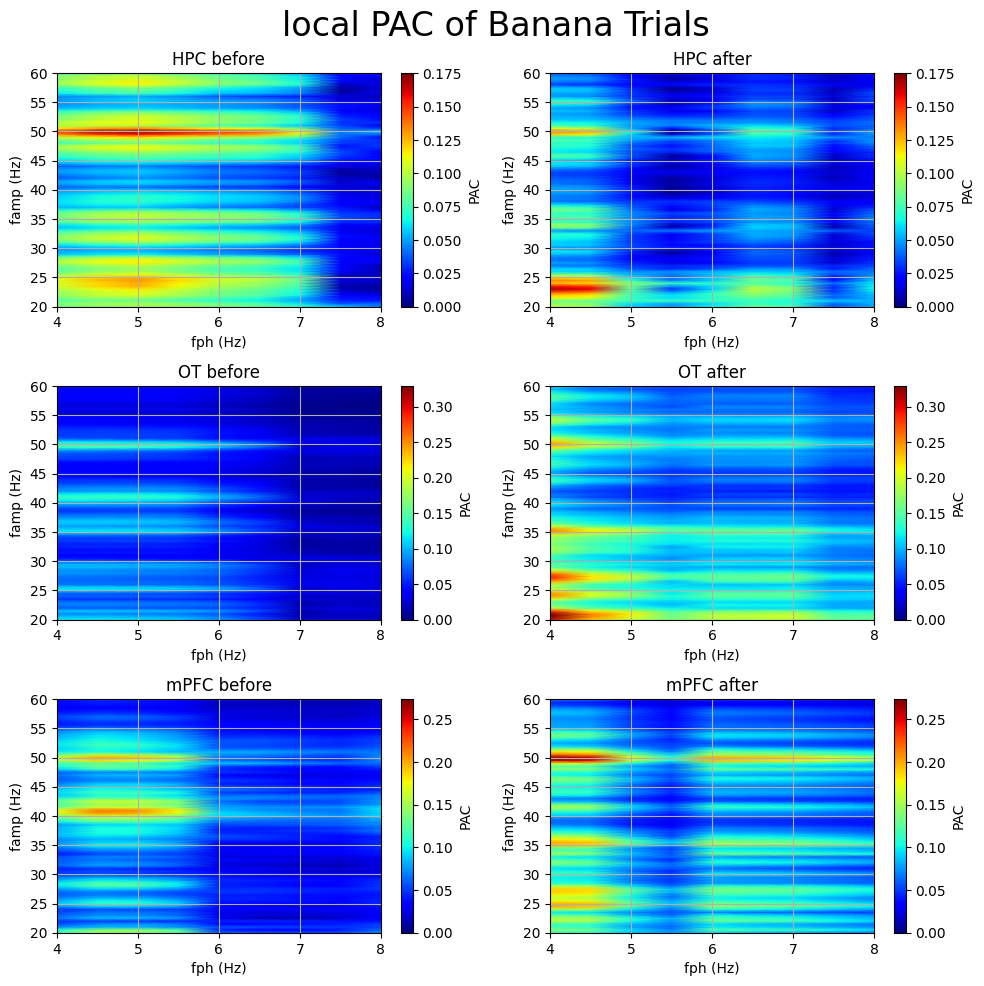

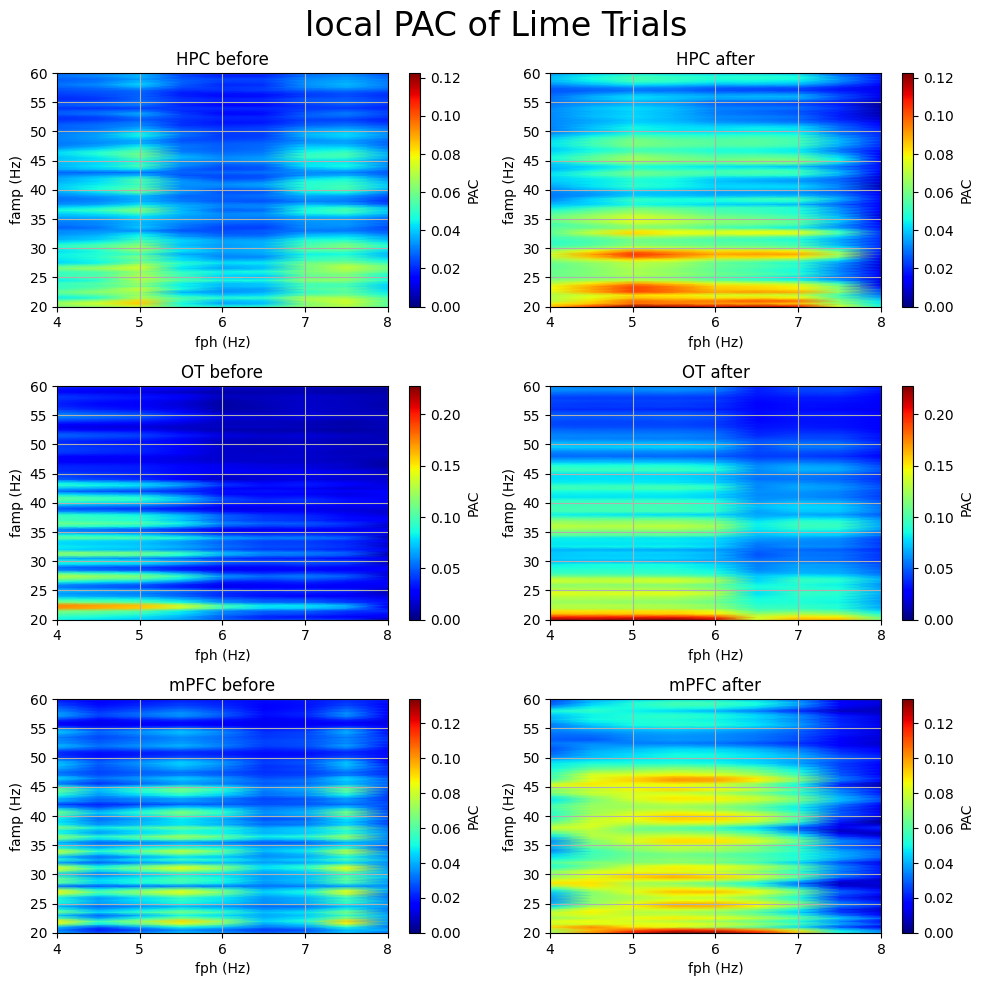

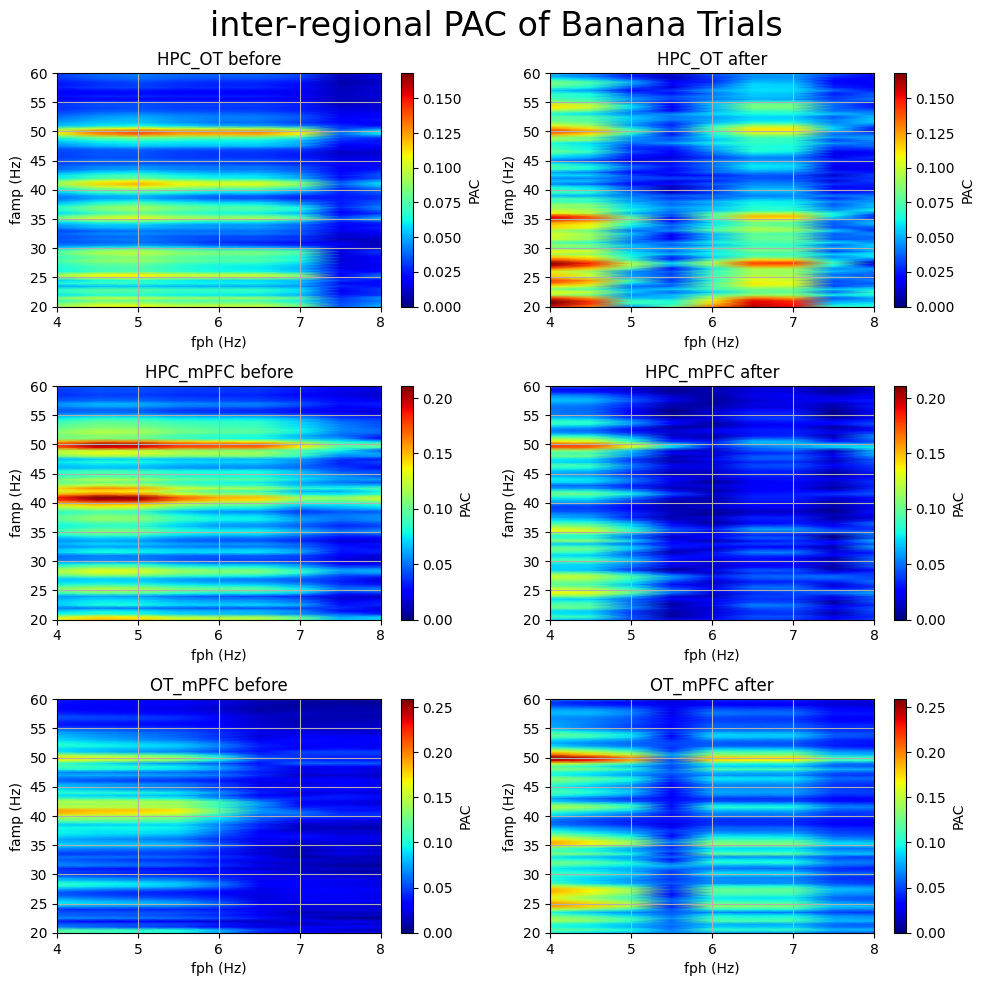

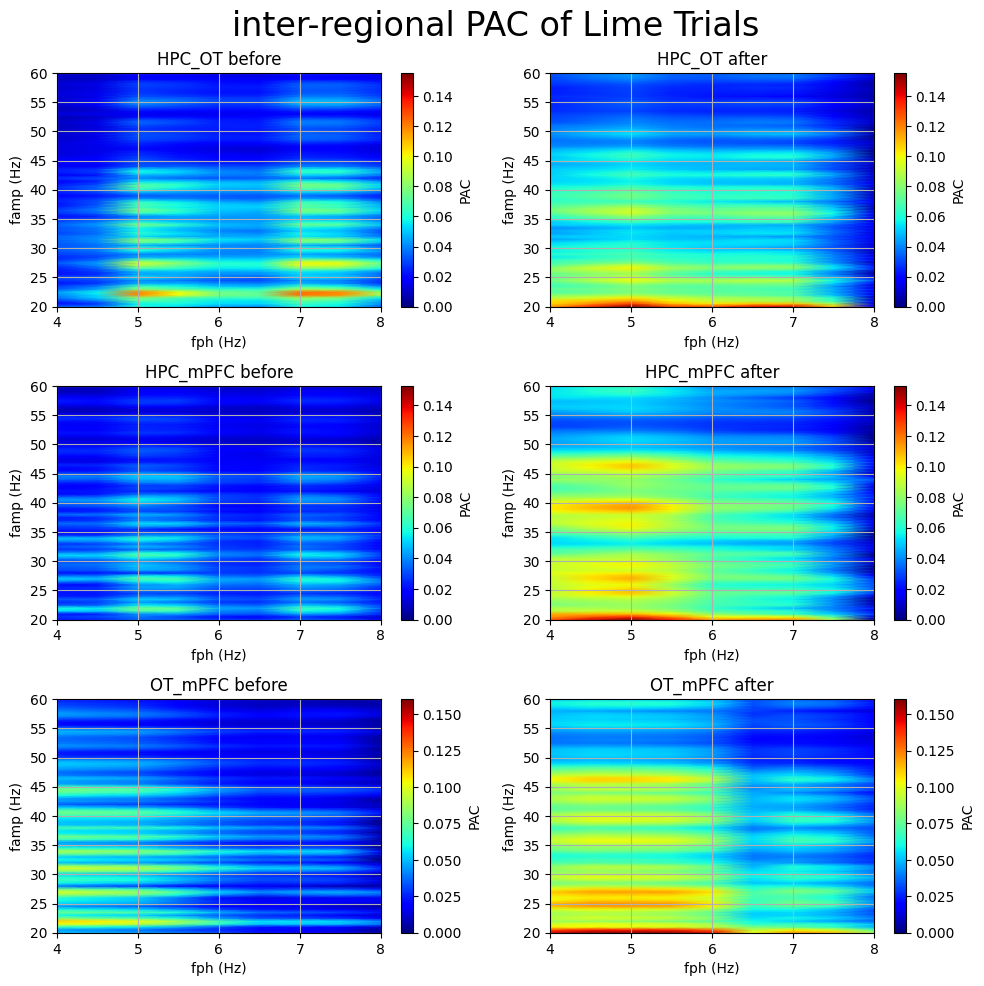

In [64]:
fph_range = [4, 8]
famp_range = [20, 60]
stimulus_time = 1.5
time_range_before = [-1+stimulus_time, 0+stimulus_time]
time_range_after = [0+stimulus_time, 1+stimulus_time]
res_freq = 0.5
famp_axes = np.linspace(famp_range[0],famp_range[1], int((famp_range[1]-famp_range[0])/res_freq + 1))
fph_axes = np.linspace(fph_range[0],fph_range[1],int((fph_range[1]-fph_range[0])/res_freq + 1))

l_PAC_ban_be = np.empty((3, len(famp_axes), len(fph_axes)))
l_PAC_ban_af = np.empty((3, len(famp_axes), len(fph_axes)))
l_PAC_lim_be = np.empty((3, len(famp_axes), len(fph_axes)))
l_PAC_lim_af = np.empty((3, len(famp_axes), len(fph_axes)))

ir_PAC_ban_be = np.empty((3, len(famp_axes), len(fph_axes)))
ir_PAC_ban_af = np.empty((3, len(famp_axes), len(fph_axes)))
ir_PAC_lim_be = np.empty((3, len(famp_axes), len(fph_axes)))
ir_PAC_lim_af = np.empty((3, len(famp_axes), len(fph_axes)))

for i in range(3):
  l_PAC_ban_be[i, :, :] = calc_PAC(ERP_Banana[:,i], ERP_Banana[:,i], fph_range, famp_range, time_range_before, res_freq, fs_ds)
  l_PAC_ban_af[i, :, :] = calc_PAC(ERP_Banana[:,i], ERP_Banana[:,i], fph_range, famp_range, time_range_after, res_freq, fs_ds)
  l_PAC_lim_be[i, :, :] = calc_PAC(ERP_Lime[:,i], ERP_Lime[:,i], fph_range, famp_range, time_range_before, res_freq, fs_ds)
  l_PAC_lim_af[i, :, :] = calc_PAC(ERP_Lime[:,i], ERP_Lime[:,i], fph_range, famp_range, time_range_after, res_freq, fs_ds)

tmp = 0
for i in range(2):
  for j in range(i+1,3):
    ir_PAC_ban_be[tmp, :, :] = calc_PAC(ERP_Banana[:,i], ERP_Banana[:,j], fph_range, famp_range, time_range_before, res_freq, fs_ds)
    ir_PAC_ban_af[tmp, :, :] = calc_PAC(ERP_Banana[:,i], ERP_Banana[:,j], fph_range, famp_range, time_range_after, res_freq, fs_ds)
    ir_PAC_lim_be[tmp, :, :] = calc_PAC(ERP_Lime[:,i], ERP_Lime[:,j], fph_range, famp_range, time_range_before, res_freq, fs_ds)
    ir_PAC_lim_af[tmp, :, :] = calc_PAC(ERP_Lime[:,i], ERP_Lime[:,j], fph_range, famp_range, time_range_after, res_freq, fs_ds)
    tmp += 1

plot_PAC (l_PAC_ban_be, l_PAC_ban_af, fph_axes, famp_axes, 'local PAC of Banana Trials', 0)
plot_PAC (l_PAC_lim_be, l_PAC_lim_af, fph_axes, famp_axes, 'local PAC of Lime Trials', 0)
plot_PAC (ir_PAC_ban_be, ir_PAC_ban_af, fph_axes, famp_axes, 'inter-regional PAC of Banana Trials', 1)
plot_PAC (ir_PAC_lim_be, ir_PAC_lim_af, fph_axes, famp_axes, 'inter-regional PAC of Lime Trials', 1)

Overall, it's noticeable that there is an increase in PAC values between the theta band phase frequency and the low gamma band amplitude frequency across all three regions following stimulus presentation, particularly during Lime trials.

# Time-Varying Phase-Amplitude Coupling (tv-PAC)

In this section, we aim to analyze the dynamics of Phase-Amplitude Coupling (PAC) over time. This can be achieved using a sliding window technique. Set the window size to `0.25sec` and slide it with `75%` overlap across the ERP signals for each channel in both odorants. Within each window, calculate the PAC and then average it over the phase frequency range of theta band `4Hz-8Hz`. Finally, generate time-frequency plots for PAC between each pair of channels (local PAC and inter-regional PAC). You can use the `calc_PAC()` function you've written in the previous section. Compare the results and find the effect of odorants in the neural connectivities. *`20 Points`*

In [76]:
def calc_tvPAC(data_1, data_2, fph_range, famp_range, t_win, overlap, res_freq, fs):
    window_size = t_win
    step = (1-overlap)*window_size
    tvPAC_matrix = []
    num_windows = int((4.5-window_size)/step +1)
    for i in range(num_windows):
      time_range = [i*step,i*step+window_size]
      tvPAC_matrix.append(np.mean(calc_PAC(data_1, data_2, fph_range, famp_range, time_range, res_freq, fs),axis=1))

    return np.array(tvPAC_matrix).T

def plot_tvPAC (tvPAC_matrix, t_axes, famp_axes, title, mode):

    fig = plt.figure(figsize=(12,8))
    if mode == 0:
      title_set = ['HPC', 'OT', 'mPFC']
    elif mode == 1:
      title_set = ['HPC_OT', 'HPC_mPFC', 'OT_mPFC']

    for i in range(3):

      plt.subplot(3,1,i+1)
      plt.pcolormesh(t_axes, famp_axes, tvPAC_matrix[i,:,:], cmap='jet', shading='gouraud')
      plt.colorbar(label='PAC')
      plt.xlabel('time (s)')
      plt.ylabel('famp (Hz)')
      plt.title(title_set[i])
      plt.axvline(0,color='red',linestyle='dashed')
      plt.grid(True)

    fig.suptitle(title, fontsize=24)
    fig.tight_layout(pad=1.0)
    plt.show()


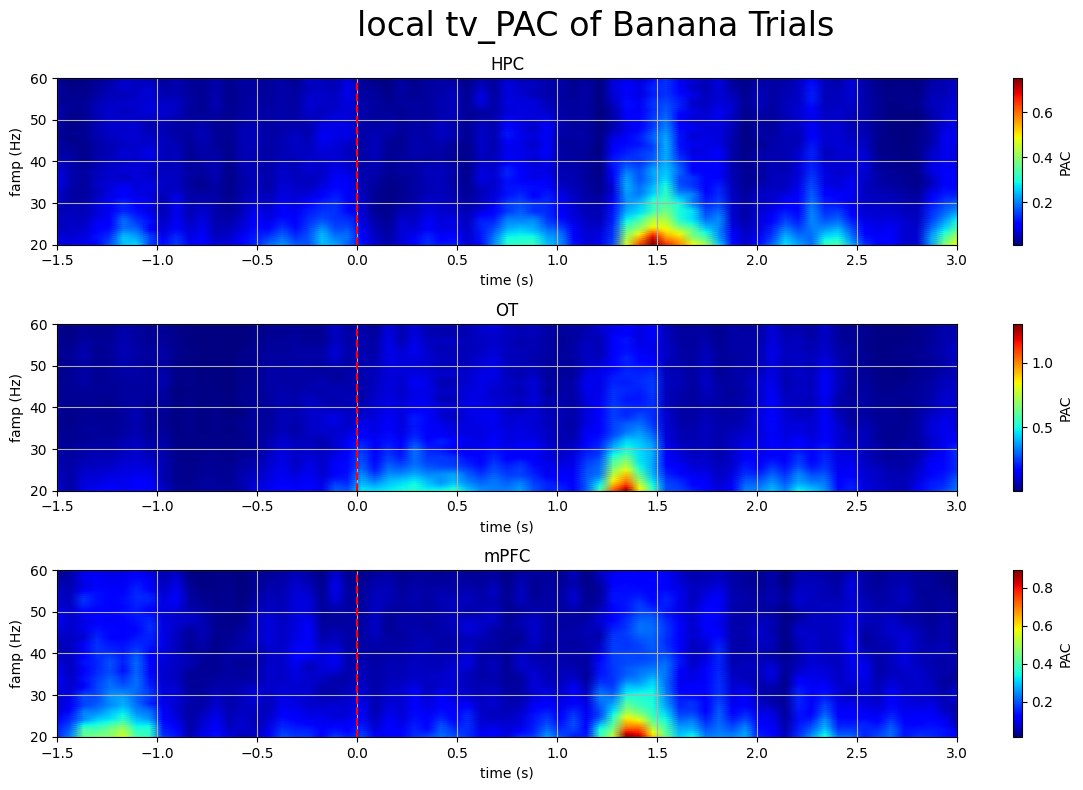

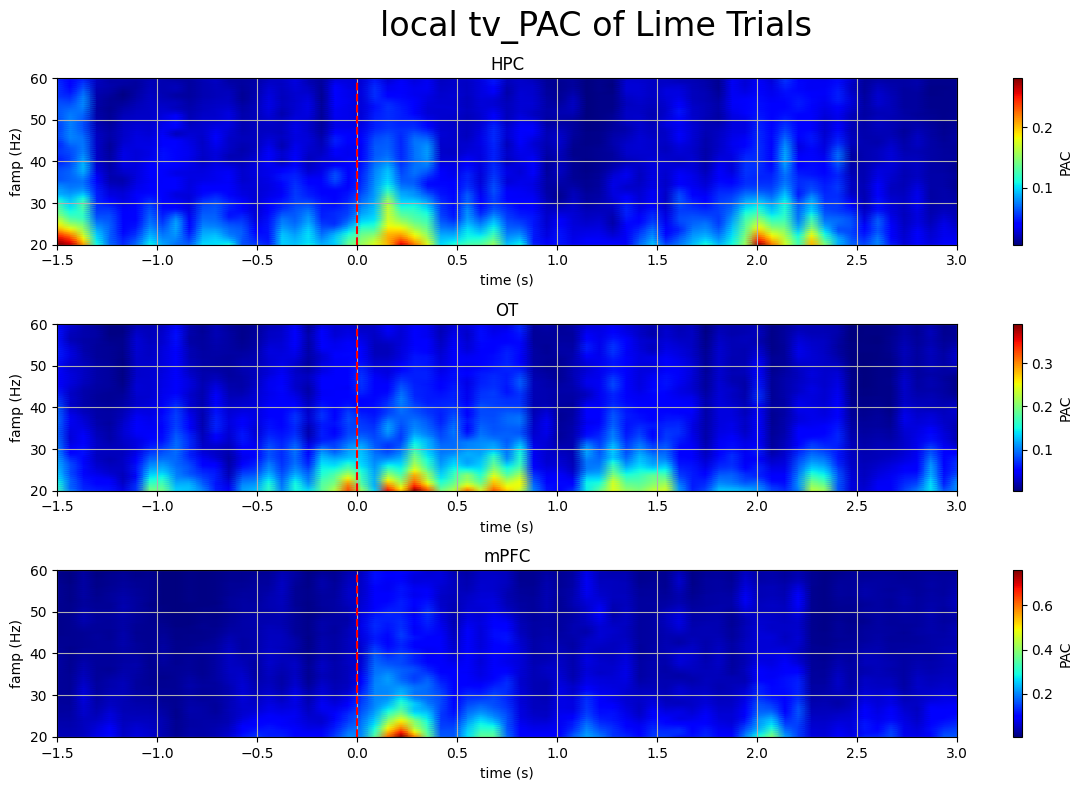

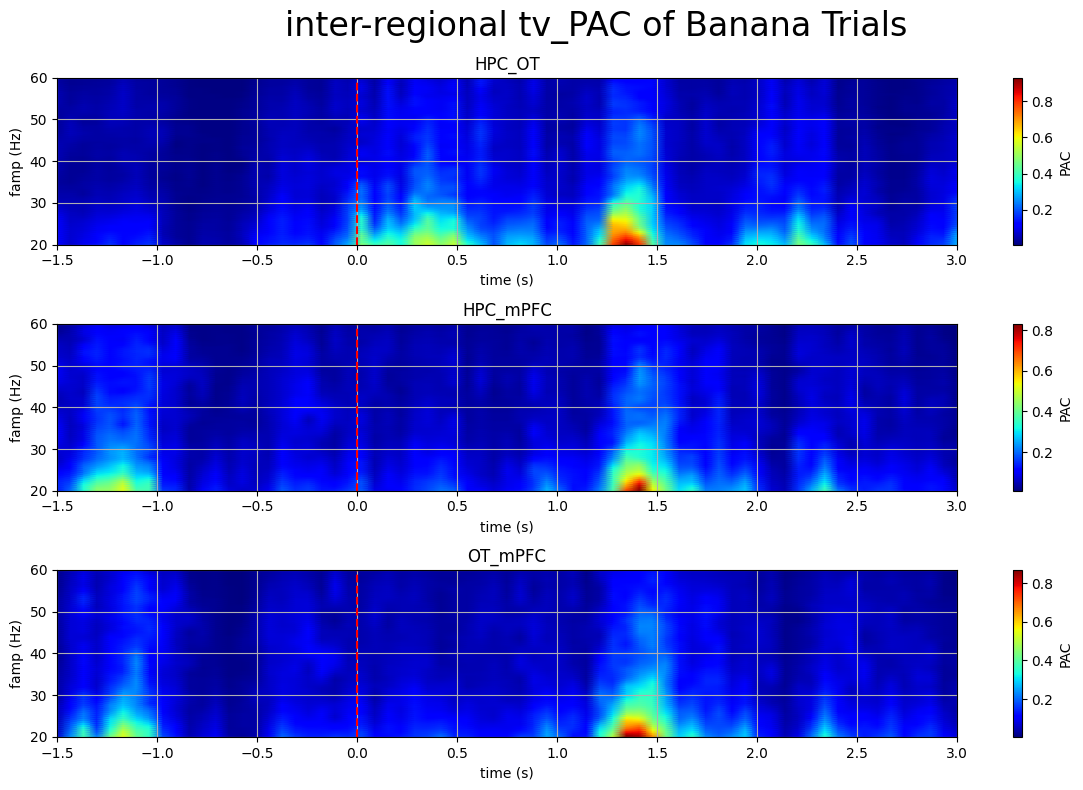

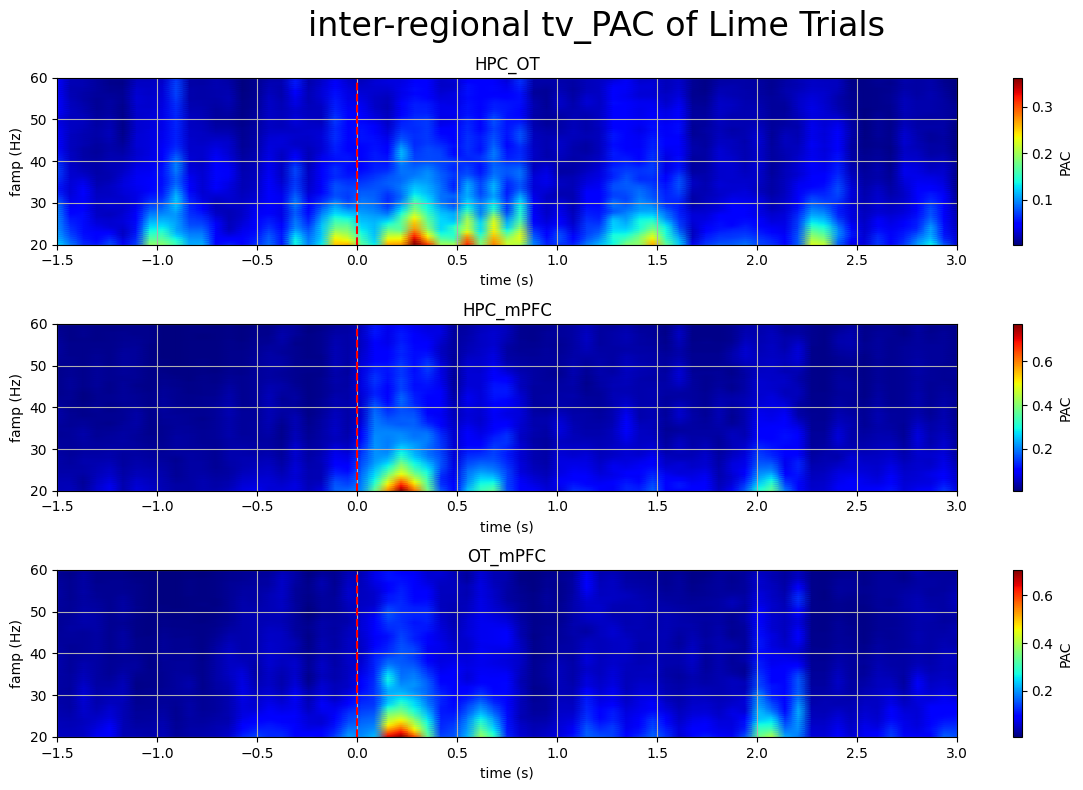

In [66]:
fph_range = [4, 8]
famp_range = [20, 60]
res_freq = 0.5
t_win = 0.25
overlap = 0.75
t_axes = np.linspace(-1.5,3,int((4.5-t_win)/((1-overlap)*t_win) +1))
famp_axes = np.linspace(famp_range[0],famp_range[1], int((famp_range[1]-famp_range[0])/res_freq + 1))

l_tvPAC_ban = np.empty((3, len(famp_axes), len(t_axes)))
l_tvPAC_lim = np.empty((3, len(famp_axes), len(t_axes)))
ir_tvPAC_ban = np.empty((3, len(famp_axes), len(t_axes)))
ir_tvPAC_lim = np.empty((3, len(famp_axes), len(t_axes)))

for i in range(3):
  l_tvPAC_ban[i, :, :] = calc_tvPAC(ERP_Banana[:,i], ERP_Banana[:,i], fph_range, famp_range, t_win, overlap, res_freq, fs_ds)
  l_tvPAC_lim[i, :, :] = calc_tvPAC(ERP_Lime[:,i], ERP_Lime[:,i], fph_range, famp_range, t_win, overlap, res_freq, fs_ds)

tmp = 0
for i in range(2):
  for j in range(i+1,3):
    ir_tvPAC_ban[tmp, :, :] = calc_tvPAC(ERP_Banana[:,i], ERP_Banana[:,j], fph_range, famp_range, t_win, overlap, res_freq, fs_ds)
    ir_tvPAC_lim[tmp, :, :] = calc_tvPAC(ERP_Lime[:,i], ERP_Lime[:,j], fph_range, famp_range, t_win, overlap, res_freq, fs_ds)
    tmp += 1


plot_tvPAC (l_tvPAC_ban, t_axes, famp_axes, 'local tv_PAC of Banana Trials', 0)
plot_tvPAC (l_tvPAC_lim, t_axes, famp_axes, 'local tv_PAC of Lime Trials', 0)
plot_tvPAC (ir_tvPAC_ban, t_axes, famp_axes, 'inter-regional tv_PAC of Banana Trials', 1)
plot_tvPAC (ir_tvPAC_lim, t_axes, famp_axes, 'inter-regional tv_PAC of Lime Trials', 1)

In banana trials, there is an observable increase in time varying local PAC approximately 1.5 seconds after the stimulus presentation, evident across all regions, but most notably in the HPC and mPFC regions. Conversely, in lime trials, the time varying local PAC shows an increase in less than 0.5 seconds across all three regions, with the mPFC exhibiting a higher amplitude.

# Bonus: Modulation Index (MI) `+10 Points`

The Mean Vector Length (MVL) is not the only method for calculating Phase-Amplitude Coupling (PAC); another alternative is the Modulation Index (MI). You can find a detailed explanation of this method in [this paper](https://doi.org/10.1073/pnas.0810524105).

Simply implement the MI method and compute the time-varying PAC (tv-PAC) for each channel (l-PAC) and between channels (ir-PAC) using **ERP signals**. Then, compare the results with the MVL method used in the previous section. *`7 Points`*

`Theoretical Question:` In [this paper](https://doi.org/10.3389/fnins.2019.00573), different methods for calculating PAC and PLV and Generalized-Linear-Modeling-Cross-Frequency-Coupling (GLM) are evaluated. After reading the paper, determine when we should use MVL or MI for calculating PAC. *`3 Points`*

MVL (Mean Vector Length) excels in situations where data epochs are long and have high sampling rates and signal-to-noise ratios, thanks to its sensitivity to modulation strength and width. However, it is vulnerable to distortions from amplitude outliers and non-uniform phase angle distributions, which can compromise its effectiveness under certain conditions. On the other hand, the Modulation Index (MI) is robust against factors such as noise, varying data lengths, and multimodal distributions, making it ideal for analyzing more complex or problematic datasets. MI's reliance on calculating Shannon's Entropy introduces complexity, as it depends on the number of bins used and the data distribution, potentially complicating result interpretation. In choosing between these methods, MVL is preferable for high-quality, long data sequences focused on modulation detail, while MI is better suited for handling shorter, noisier data where robustness against external variables is crucial.

In [58]:
def calc_MI(tfd1, tfd2, fph, famp):

    amp = np.abs(tfd2[famp,:])
    phase = np.angle(tfd1[fph,:])

    nbins = 18
    bin_edges = np.linspace(-np.pi, np.pi, nbins + 1)
    bin_indices = np.digitize(phase, bin_edges) - 1
    bin_indices[bin_indices == nbins] = 0

    amp_bin = np.zeros(nbins)
    for i in range(nbins):
        indices = bin_indices == i
        if np.any(indices):
            amp_bin[i] = np.mean(amp[indices])

    amp_p = amp_bin / np.sum(amp_bin)

    amp_q = np.ones(nbins) / nbins
    with np.errstate(divide='ignore', invalid='ignore'):
        log_div = np.log(amp_p / amp_q)
        log_div[np.isinf(log_div) | np.isnan(log_div)] = 0
    dist_kl = np.sum(amp_p * log_div)
    MI = dist_kl / np.log(nbins)

    return MI

def calc_PAC_MI(data_1, data_2, fph_range, famp_range, time_range, res_freq, fs):

    data_1_time_range = data_1[int(time_range[0]*fs):int(time_range[1]*fs)]
    data_2_time_range = data_2[int(time_range[0]*fs):int(time_range[1]*fs)]

    fbins = int(fs/res_freq)

    tfd_1 = rid_rihaczek(data_1_time_range, fbins)
    tfd_2 = rid_rihaczek(data_2_time_range, fbins)

    famp_axes = np.linspace(famp_range[0],famp_range[1], int((famp_range[1]-famp_range[0])/res_freq + 1))
    fph_axes = np.linspace(fph_range[0],fph_range[1],int((fph_range[1]-fph_range[0])/res_freq + 1))

    PAC_matrix = np.zeros((len(famp_axes), len(fph_axes)))
    counter_1 = 0
    for fa in famp_axes:
      counter_2 = 0
      for fph in fph_axes:
        PAC_matrix[counter_1,counter_2] = calc_MI(tfd_1, tfd_2, int(fph/res_freq), int(fa/res_freq))
        counter_2 += 1
      counter_1 += 1

    return PAC_matrix

def calc_tvPAC_MI(data_1, data_2, fph_range, famp_range, t_win, overlap, res_freq, fs):

    window_size = t_win
    step = (1-overlap)*window_size
    tvPAC_matrix = []
    num_windows = int((4.5-window_size)/step +1)
    for i in range(num_windows):
      time_range = [i*step,i*step+window_size]
      tvPAC_matrix.append(np.mean(calc_PAC_MI(data_1, data_2, fph_range, famp_range, time_range, res_freq, fs),axis=1))

    return np.array(tvPAC_matrix).T

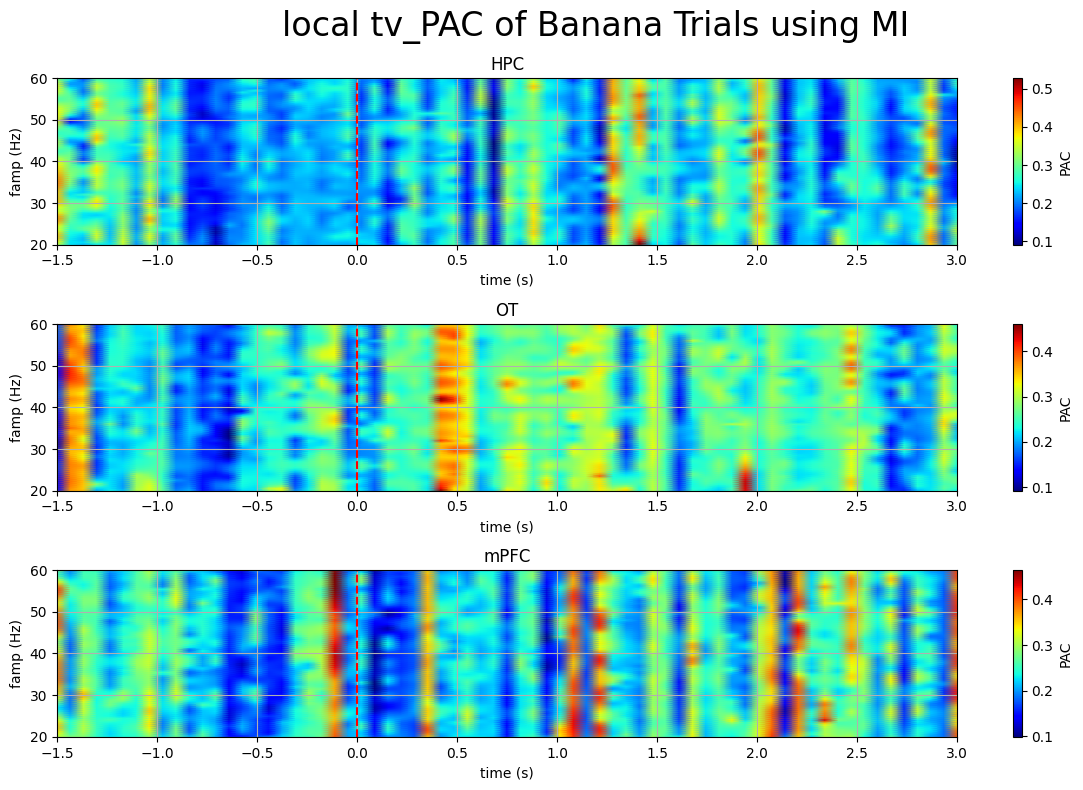

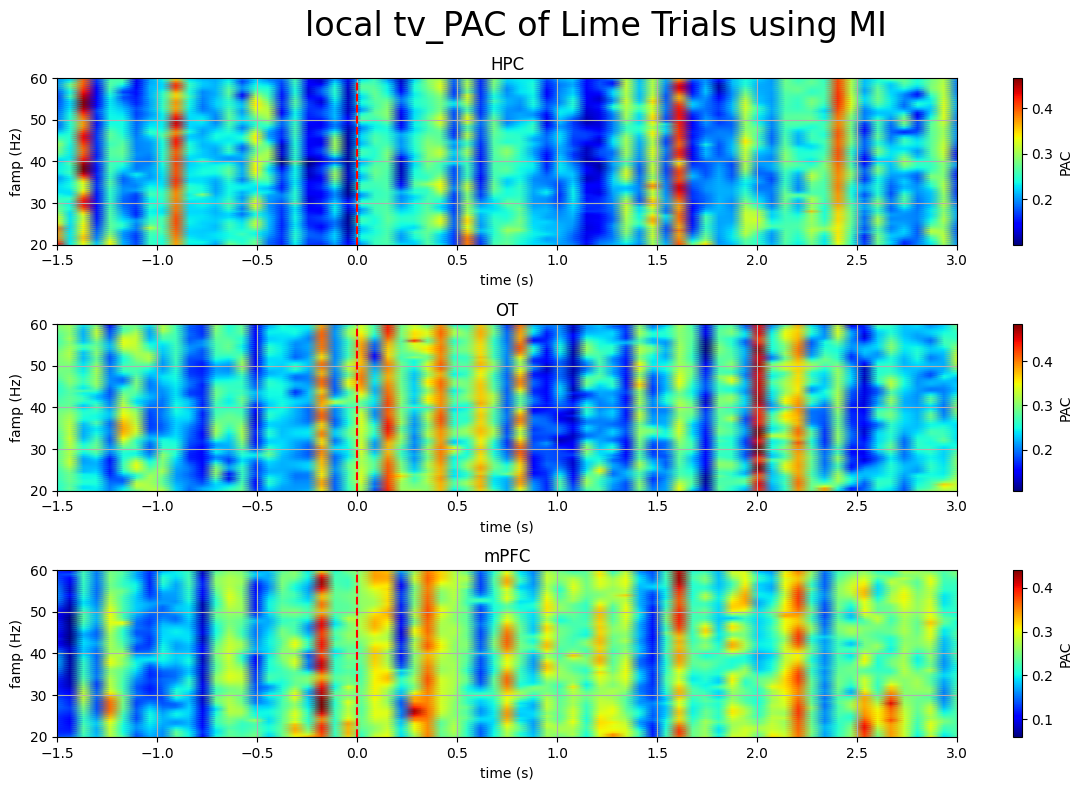

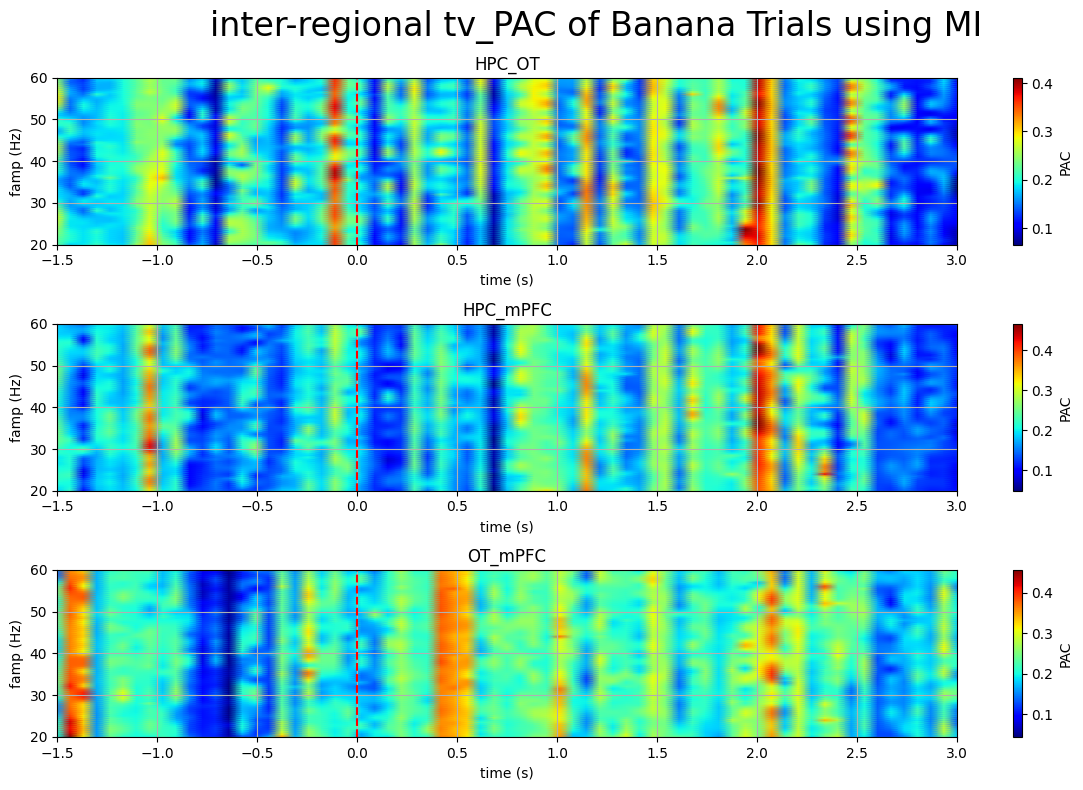

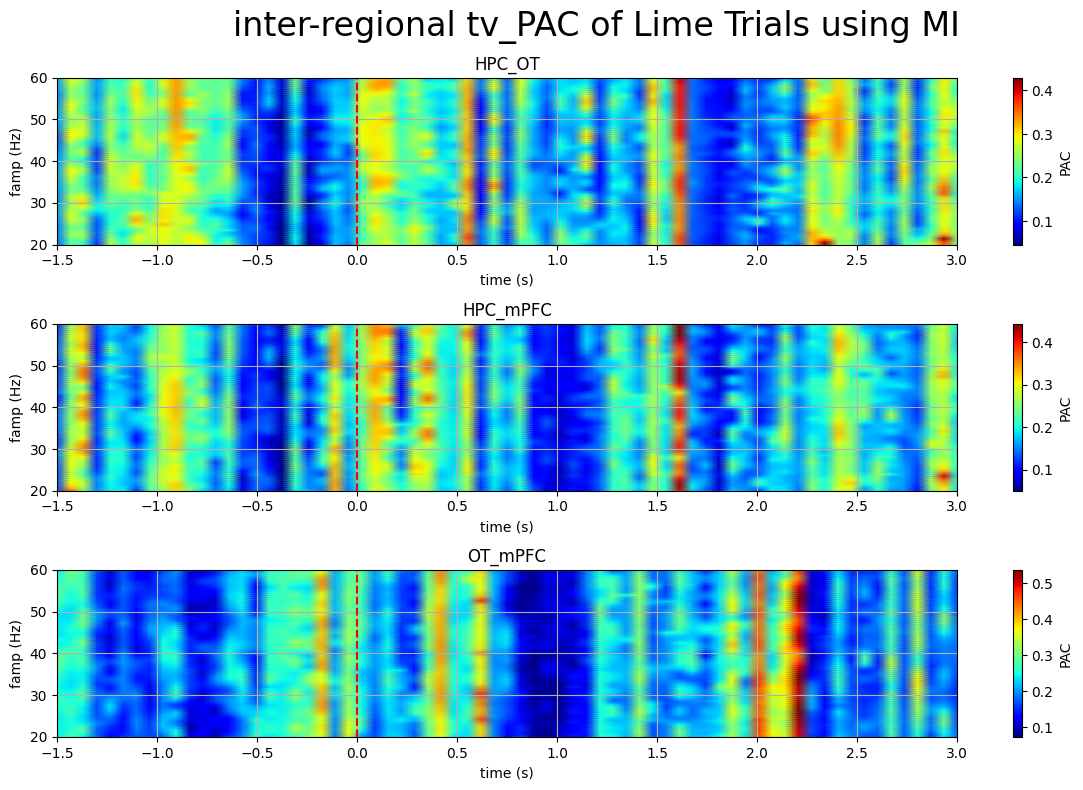

In [61]:
fph_range = [4, 8]
famp_range = [20, 60]
res_freq = 0.5
t_win = 0.25
overlap = 0.75
t_axes = np.linspace(-1.5,3,int((4.5-t_win)/((1-overlap)*t_win) +1))
famp_axes = np.linspace(famp_range[0],famp_range[1], int((famp_range[1]-famp_range[0])/res_freq + 1))

l_tvPAC_MI_ban = np.empty((3, len(famp_axes), len(t_axes)))
l_tvPAC_MI_lim = np.empty((3, len(famp_axes), len(t_axes)))
ir_tvPAC_MI_ban = np.empty((3, len(famp_axes), len(t_axes)))
ir_tvPAC_MI_lim = np.empty((3, len(famp_axes), len(t_axes)))

for i in range(3):
  l_tvPAC_MI_ban[i, :, :] = calc_tvPAC_MI(ERP_Banana[:,i], ERP_Banana[:,i], fph_range, famp_range, t_win, overlap, res_freq, fs_ds)
  l_tvPAC_MI_lim[i, :, :] = calc_tvPAC_MI(ERP_Lime[:,i], ERP_Lime[:,i], fph_range, famp_range, t_win, overlap, res_freq, fs_ds)

tmp = 0
for i in range(2):
  for j in range(i+1,3):
    ir_tvPAC_MI_ban[tmp, :, :] = calc_tvPAC_MI(ERP_Banana[:,i], ERP_Banana[:,j], fph_range, famp_range, t_win, overlap, res_freq, fs_ds)
    ir_tvPAC_MI_lim[tmp, :, :] = calc_tvPAC_MI(ERP_Lime[:,i], ERP_Lime[:,j], fph_range, famp_range, t_win, overlap, res_freq, fs_ds)
    tmp += 1

plot_tvPAC (l_tvPAC_MI_ban, t_axes, famp_axes, 'local tv_PAC of Banana Trials using MI', 0)
plot_tvPAC (l_tvPAC_MI_lim, t_axes, famp_axes, 'local tv_PAC of Lime Trials using MI', 0)
plot_tvPAC (ir_tvPAC_MI_ban, t_axes, famp_axes, 'inter-regional tv_PAC of Banana Trials using MI', 1)
plot_tvPAC (ir_tvPAC_MI_lim, t_axes, famp_axes, 'inter-regional tv_PAC of Lime Trials using MI', 1)
